### Задание 1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [6]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


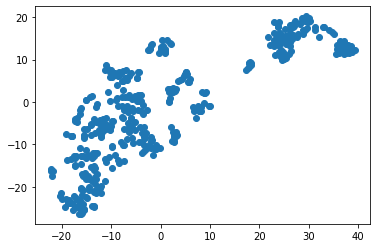

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

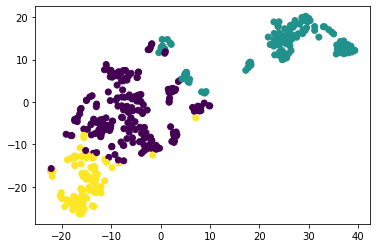

In [19]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

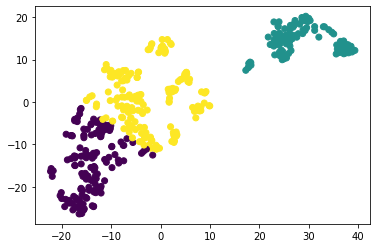

In [20]:
labels_train = kmeans.fit_predict(X_train_tsne)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [38]:
X_train.index = np.arange(404)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
400,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
401,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
402,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [92]:
df_clasters = pd.DataFrame(pd.Series(labels_train))
df_clasters.shape

(404, 1)

In [93]:
df_X_clasters = pd.concat([X_train, df_clasters], axis = 1)

In [94]:
df_X_clasters = df_X_clasters.rename(columns = {0 : 'Clasters'})
df_y_clasters = pd.DataFrame({'price': y_train, 'Clasters': labels_train}, columns = ['price', 'Clasters'])

### (CRIM средний, price средняя)

In [95]:
df_X_clasters.loc[df_X_clasters['Clasters'] == 0]['CRIM'].mean(), df_y_clasters.loc[df_y_clasters['Clasters'] == 0]['price'].mean()

(0.09462279411764711, 26.564705882352936)

In [96]:
df_X_clasters.loc[df_X_clasters['Clasters'] == 1]['CRIM'].mean(), df_y_clasters.loc[df_y_clasters['Clasters'] == 1]['price'].mean()

(13.17982178217822, 16.277227722772285)

In [97]:
df_X_clasters.loc[df_X_clasters['Clasters'] == 2]['CRIM'].mean(), df_y_clasters.loc[df_y_clasters['Clasters'] == 2]['price'].mean()

(0.6829679640718564, 23.67065868263472)

### Задание 3

In [98]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = kmeans.fit_predict(X_test_tsne)

In [99]:
labels_test.shape, y_test.shape

((102,), (102,))

In [100]:
X_test.shape

(102, 13)

In [101]:
df_X_clasters = pd.DataFrame({'CRIM': X_test['CRIM'], 'Clasters': labels_test}, columns = ['CRIM', 'Clasters'])
df_y_clasters = pd.DataFrame({'price': y_test, 'Clasters': labels_test}, columns = ['price', 'Clasters'])

In [102]:
df_X_clasters.loc[df_X_clasters['Clasters'] == 0]['CRIM'].mean(), df_y_clasters.loc[df_y_clasters['Clasters'] == 0]['price'].mean()

(10.707682121212121, 16.421212121212122)

In [103]:
df_X_clasters.loc[df_X_clasters['Clasters'] == 1]['CRIM'].mean(), df_y_clasters.loc[df_y_clasters['Clasters'] == 1]['price'].mean()

(0.10555710526315791, 26.910526315789472)

In [104]:
df_X_clasters.loc[df_X_clasters['Clasters'] == 2]['CRIM'].mean(), df_y_clasters.loc[df_y_clasters['Clasters'] == 2]['price'].mean()

(0.41909322580645153, 20.23548387096774)